# Graphs

## Theory

A **graph** $G$ of order $o$ will be fully described by a square **adjacency matrix** $\mathcal{A}\in\mathbb{M}_{o\times o}(\mathbb{K})$ and a **state vector** $\mathcal{S}\in\mathbb{K}^{o}$.

$$G = \{\mathcal{A}, \mathcal{S}\}$$

The **adjacency matrix** contains the weights $w(e_{i,j})$ of the edges (from $v_i$ to $v_j$ in this case). The particular case of $w(e_{i,j})=0$ indicates that their is no edge going from $v_i$ to $v_j$.

$$\mathcal{A}_{i,j}=w(e_{i,j})$$

The **state vector** contains the states $s(v_i)$ of the vertices $v_i$.

$$\mathcal{S}_i=s(v_i)$$

The **neighborhood** $N(v)$ of a **vertex** $v$ is the set of vertices which are adjacent to it. Thanks to the linear algebra description of graphs, there is a simple way to obtain a vector containing the weighted sum of the states present in the neighborhood of every vertex of a graph.

$$\begin{pmatrix} \sum \limits _{v_i\in N(v_1)} w(e_{1,i})\times s(v_i) \\ \vdots \\ \sum \limits _{v_i\in N(v_o)} w(e_{o,i})\times s(v_i) \end{pmatrix}=\begin{pmatrix} \sum \limits _{i=1}^o w(e_{1,i})\times s(v_i) \\ \vdots \\ \sum \limits _{i=1}^o w(e_{o,i})\times s(v_i) \end{pmatrix}=\mathcal{A}\cdot\mathcal{S}$$

We can also define the **n-th neighborhood** $N_n(v)$ of a vertex as the set of vertices which are at a distance $n$ of $v$.

## Implementation
The `Graph` class has the atributes:
* `adjacency_matrix` ( an instance of the SparseTensor class of TensorFlow )
* `state_vector` ( an instance of the Tensor class of TensorFlow )

And the methods:
* `.plot()`: plots the graph
* `.evolve(rule)`: evolves the graph according the `rule`
* `.order()`: returns the order of the graph
* `.clone()`: returns a copy of the graph
* `.isomorphic(other_graph)`: returns `True` if there exists an isomorphism including states between the graph and `other_graph`
* `.igraph()`: returns an igraph Graph object 
* `.mathematica()`: returns a string corresponding to a Mathematica compatible version of the graph

It can be instantiated with:
* an adjacency matrix that can be either a python nested array or a tensorflow sparse tensor.
* a state vector that can eiher be a python nested array or a tensorflow tensor.

## Example
The following piece of code displays a simple graph with 4 vertices with binary states:
* s(v)=1, called 'alive' and colored <span style="color:purple">*purple*</span>,
* s(v)=0, called 'dead' and colored <span style="color:orange">*orange*</span>.

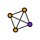

In [1]:
import gra

graph1 = gra.Graph([ # adjacency matrix
        [0, 1, 1, 1],
        [1, 0, 1, 1],
        [1, 1, 0, 1],
        [1, 1, 1, 0] 
    ],[ # state vector
        [1],
        [0],
        [0],
        [0] 
    ])

graph1.plot()

We can check if this graph is isomorphic to another that we choose to only differ by the position of the living vertex.

In [8]:
graph1.isomorphic(
    gra.Graph([ # adjacency matrix
        [0, 1, 1, 1],
        [1, 0, 1, 1],
        [1, 1, 0, 1],
        [1, 1, 1, 0] 
    ],[ # state vector
        [0],
        [0],
        [1],
        [0] 
    ]))



True